# Linear regression using NumPy



In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt

## Data Generation



In [19]:
# initialize your random seed to ensure reproducibility of your result
np.random.seed(42)

# randomly generate x which is a vector of 100 points 
x = np.random.rand(100, 1)

# define exact linear function y = 1 + 2x + epsilon where epsilon (0.1*random numbers)
y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

In [20]:
np.random.seed(42)
x = np.random.rand(100, 1)


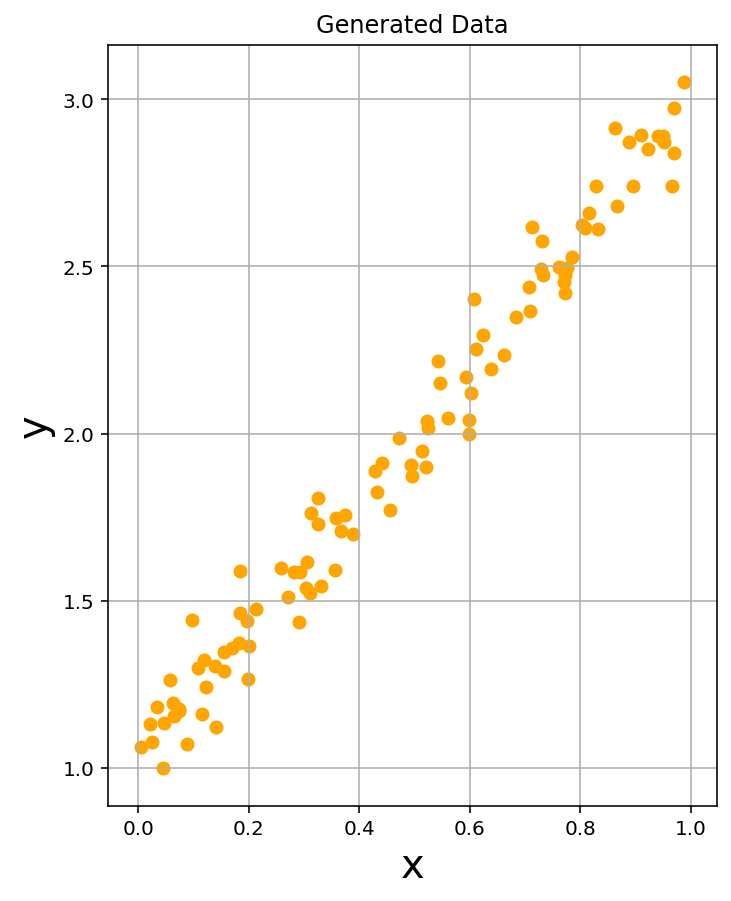

In [21]:
plt.subplot(1,2,1)
plt.scatter(x, y, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data')
plt.grid('on')

## split data into train and validation sets (80/20)



In [3]:
# Shuffles the indices
idx = np.arange(100)

np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:80]

# Uses the remaining indices for validation
val_idx = idx[80:]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


In [23]:
idx = np.arange(100)
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [25]:
np.random.shuffle(idx)
idx

array([75, 30, 74, 89, 82, 93, 68, 56, 81, 47, 69, 84,  5, 92, 77, 38, 35,
        7, 48, 60, 14, 16, 50, 27, 43, 53, 13, 22, 66, 10, 41, 95, 52, 25,
       79, 54, 28, 51,  8, 96, 31, 19, 61, 97, 17, 80, 70, 88, 73, 29, 34,
       49, 59, 85, 72, 86, 94, 58, 91, 26, 65, 36, 64, 32, 15, 37, 63, 18,
        0, 62, 40, 67, 24, 90, 98, 83,  9, 78, 71,  2, 21,  1,  3,  6, 23,
       39, 20, 76, 57,  4, 11, 12, 87, 42, 46, 33, 44, 55, 45, 99])

In [27]:
train_idx = idx[:80]
train_idx

array([75, 30, 74, 89, 82, 93, 68, 56, 81, 47, 69, 84,  5, 92, 77, 38, 35,
        7, 48, 60, 14, 16, 50, 27, 43, 53, 13, 22, 66, 10, 41, 95, 52, 25,
       79, 54, 28, 51,  8, 96, 31, 19, 61, 97, 17, 80, 70, 88, 73, 29, 34,
       49, 59, 85, 72, 86, 94, 58, 91, 26, 65, 36, 64, 32, 15, 37, 63, 18,
        0, 62, 40, 67, 24, 90, 98, 83,  9, 78, 71,  2])

In [29]:
val_idx = idx[80:]
val_idx

array([21,  1,  3,  6, 23, 39, 20, 76, 57,  4, 11, 12, 87, 42, 46, 33, 44,
       55, 45, 99])

In [30]:
x_train = x[train_idx]

In [32]:
y_train = y[train_idx]

In [34]:
x_test = x[val_idx]

In [36]:
y_test = y[val_idx]

## plot the train and validation sets

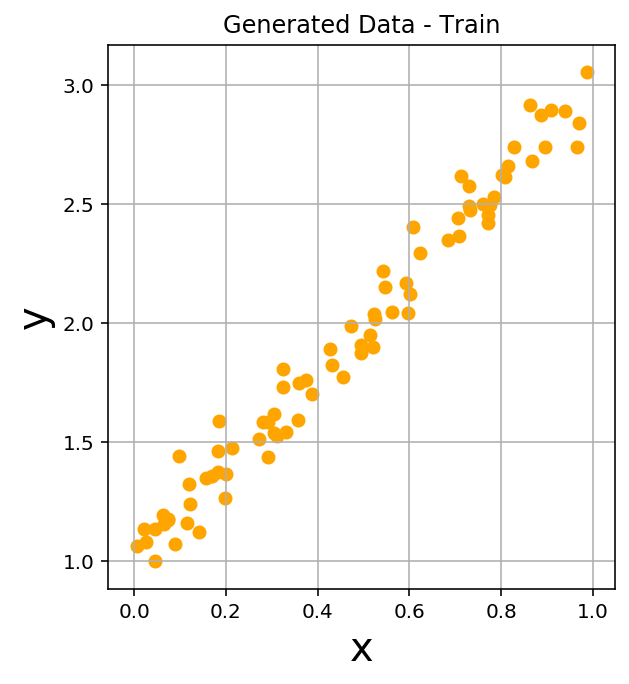

In [38]:
plt.figure(figsize=(10,5))

# plot the train set 
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='orange')  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')



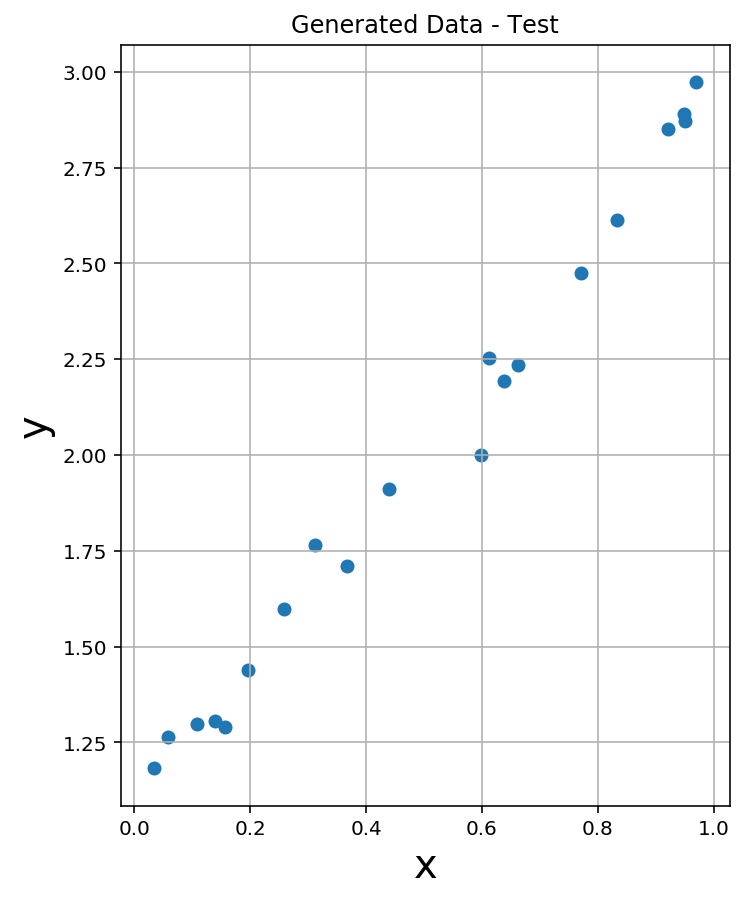

In [39]:
# plot the validation set 
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)  
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Test')
plt.grid('on')

plt.show()

## linear regression using numpy 



In [40]:
# # initialize your random seed to ensure reproducibility of your result
# np.random.seed(42)

# # Initializes parameters "a" and "b" randomly - they don't need to be good yet
# a = np.random.randn(1)
# b = np.random.randn(1)

# # print values of a and b 
# print(a, b)


[0.49671415] [-0.1382643]


In [42]:
# Initialization of hyper-parameters (in our case, only learning rate and number of epochs)

# Sets learning rate (how much the AI conforms to each set of feedbacks)
lr = 1e-1
# Defines number of epochs (how many times training is repeated)
n_epochs = 1000

### For each epoch, there are 5 training steps:

* Compute model’s predictions 
* Compute the error (the difference between the actual value and predicted value) 
* Compute the loss ( mean square error = the average of (error)^2)
* Compute the gradients for every parameter (require calculus)
* Update the parameters a and b



In [45]:
# for epoch in range(n_epochs):
#     # Computes our model's predicted output
#     yhat = a + b * x_train
    
#     # How wrong is our model? That's the error! 
#     error = (y_train - yhat)
    
#     # It is a regression, so it computes mean squared error (MSE)
#     loss = (error ** 2).mean()
    
#     # Computes gradients for both "a" and "b" parameters
#     a_grad = -2 * error.mean()
    
#     b_grad = -2 * (x_train * error).mean()
    
#     # Updates parameters using gradients and the learning rate
#     a = a - lr * a_grad
#     b = b - lr * b_grad
    
# print(a, b)

[1.00622523] [1.9819013]


In [0]:
# y = 1 + 2 * x + 0.1 * np.random.randn(100, 1)

In [48]:
# plt.figure(figsize=(10,5))
# y_pred = a + b * x_test



# plt.plot(x_test, y_pred, '--')

# plt.scatter(x_val,y_val, c='orange')  
# plt.xlabel('x', fontsize = 20) 
# plt.ylabel('y', fontsize = 20)
# plt.title('Generated Data - Train')
# plt.grid('on')
# plt.show()

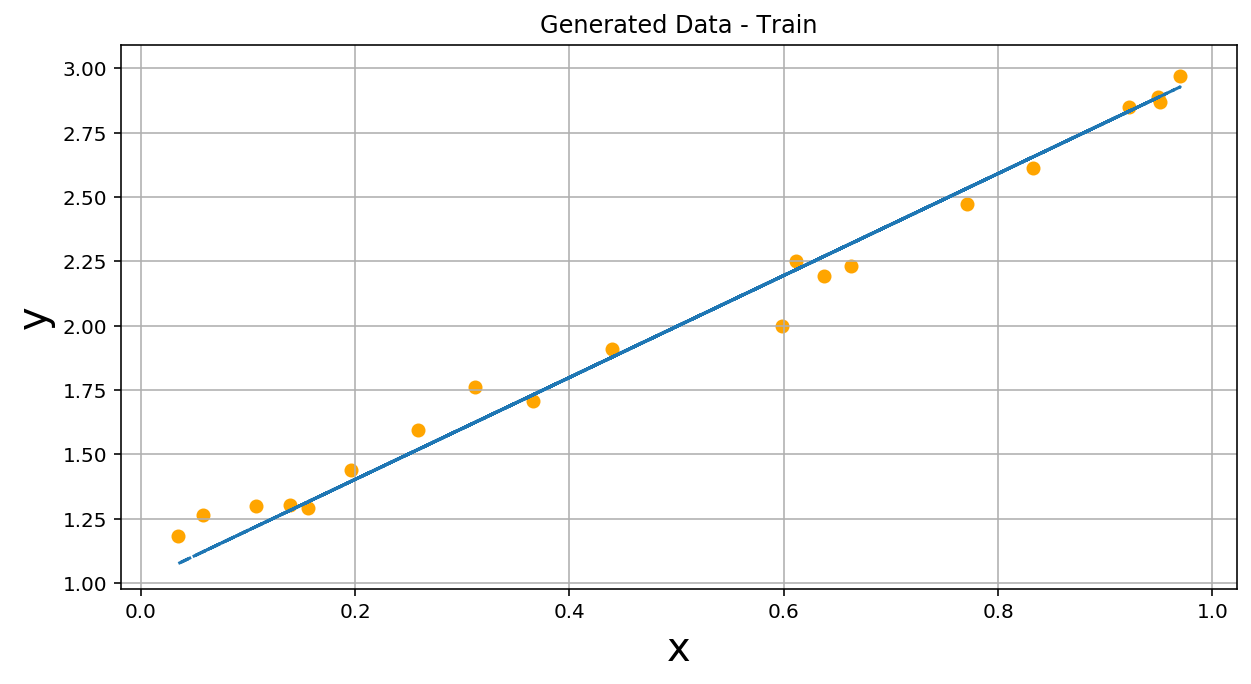

In [49]:
# plt.figure(figsize=(10,5))

# y_pred = a + b * x_test

# plt.plot(x_test, y_pred, '--')

# plt.scatter(x_test, y_test, c='orange')

# plt.xlabel('x', fontsize = 20) 
# plt.ylabel('y', fontsize = 20)
# plt.title('Generated Data - Train')
# plt.grid('on')
# plt.show()


## check our results use Scikit-learn's linear regression

Just to make sure we haven’t done any mistakes in our code, we can use Scikit-Learn’s Linear Regression to fit the model and compare the coefficients.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



In [57]:
x_train

array([[0.72900717],
       [0.60754485],
       [0.70685734],
       [0.47221493],
       [0.33089802],
       [0.5612772 ],
       [0.07455064],
       [0.0884925 ],
       [0.62329813],
       [0.52006802],
       [0.98688694],
       [0.31098232],
       [0.15599452],
       [0.76078505],
       [0.07404465],
       [0.68423303],
       [0.80839735],
       [0.86617615],
       [0.54671028],
       [0.38867729],
       [0.18182497],
       [0.30424224],
       [0.96958463],
       [0.51423444],
       [0.9093204 ],
       [0.89482735],
       [0.21233911],
       [0.29214465],
       [0.14092422],
       [0.02058449],
       [0.49517691],
       [0.4937956 ],
       [0.93949894],
       [0.78517596],
       [0.11586906],
       [0.59789998],
       [0.59241457],
       [0.77513282],
       [0.60111501],
       [0.52273283],
       [0.17052412],
       [0.29122914],
       [0.27134903],
       [0.42754102],
       [0.52475643],
       [0.86310343],
       [0.77224477],
       [0.887

In [58]:
y_train

array([[2.49265916],
       [2.40370829],
       [2.43876397],
       [1.98570794],
       [1.5426657 ],
       [2.04718078],
       [1.17508957],
       [1.07075463],
       [2.29397955],
       [1.89995094],
       [3.05195616],
       [1.52449648],
       [1.3477003 ],
       [2.49703129],
       [1.17131467],
       [2.34922996],
       [2.61414331],
       [2.68052527],
       [2.15210627],
       [1.69902925],
       [1.37335769],
       [1.53827918],
       [2.84011562],
       [1.94824115],
       [2.89383411],
       [2.73930714],
       [1.47600496],
       [1.58480064],
       [1.12110013],
       [1.1327092 ],
       [1.87348602],
       [1.90601016],
       [2.88896302],
       [2.52828739],
       [1.16030298],
       [2.04073361],
       [2.16870057],
       [2.49363587],
       [2.12138066],
       [2.03775549],
       [1.35850603],
       [1.43610679],
       [1.51049191],
       [1.88919723],
       [2.01674665],
       [2.9127843 ],
       [2.42079447],
       [2.870

In [60]:
x_test

array([[0.13949386],
       [0.95071431],
       [0.59865848],
       [0.05808361],
       [0.36636184],
       [0.44015249],
       [0.61185289],
       [0.77127035],
       [0.19598286],
       [0.15601864],
       [0.96990985],
       [0.83244264],
       [0.63755747],
       [0.03438852],
       [0.31171108],
       [0.94888554],
       [0.25877998],
       [0.92187424],
       [0.66252228],
       [0.10789143]])

In [61]:
y_test

array([[1.30509325],
       [2.87152788],
       [1.99856008],
       [1.26395663],
       [1.70926497],
       [1.91045972],
       [2.25331782],
       [2.47453822],
       [1.43932497],
       [1.29007009],
       [2.97269482],
       [2.61190926],
       [2.19304671],
       [1.18305932],
       [1.76370158],
       [2.89032648],
       [1.59666316],
       [2.85060477],
       [2.23410582],
       [1.29850118]])

In [62]:
from sklearn.linear_model import LinearRegression

In [52]:
linr = LinearRegression()

In [63]:
linr.fit(x_train, y_train)

LinearRegression()

In [64]:
print(linr.intercept_, linr.coef_[0])

[1.00622435] [1.98190309]


In [8]:
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

[1.02354075] [1.96896447]


## The results!

They match up to 6 decimal places — we have a fully working implementation of linear regression using Numpy.

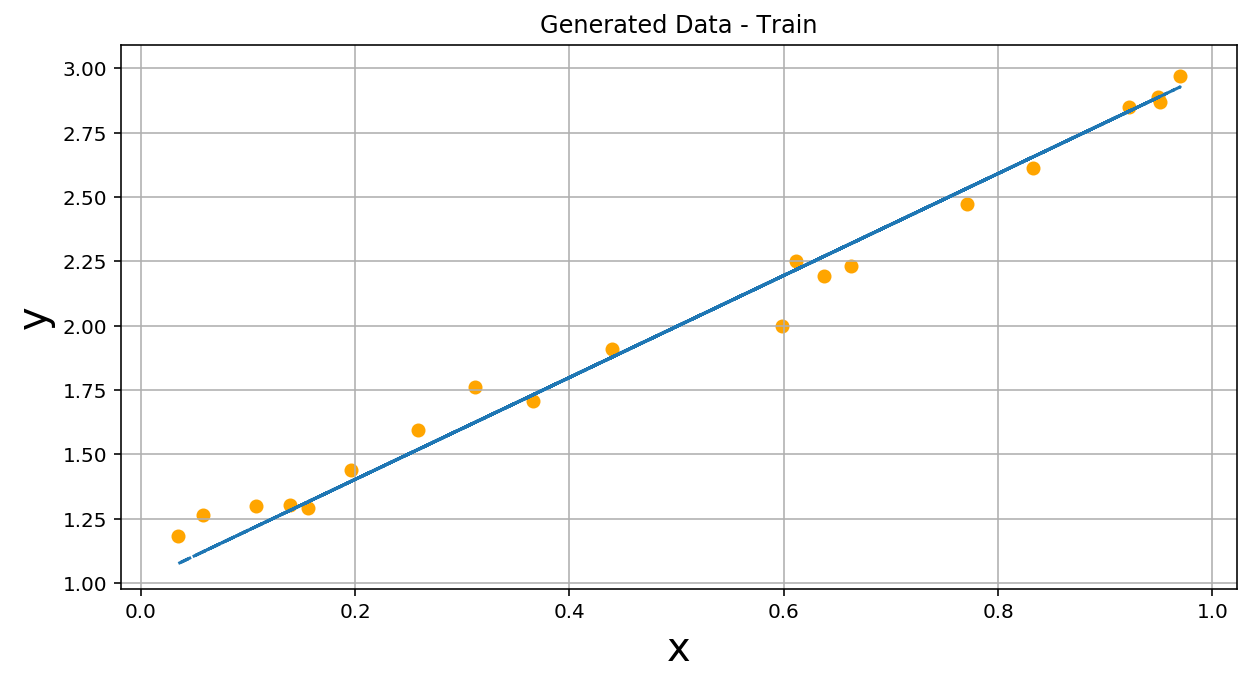

In [56]:
plt.figure(figsize=(10,5))


# make prediction
y_pred = linr.intercept_ + linr.coef_[0] * x_test

# plot x values in test set and predicted vlaues of y of these x values
plt.plot(x_test, y_pred, '--')


# plot data points in the test set (x values and true y values)
plt.scatter(x_test, y_test, c='orange')
plt.xlabel('x', fontsize = 20) 
plt.ylabel('y', fontsize = 20)
plt.title('Generated Data - Train')
plt.grid('on')
plt.show()